In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
sys.path.insert(0, "/content/gdrive/My Drive/cs182_proj/") # This enables us to import Python libraries in the folder.

root_folder = "/content/gdrive/My Drive/cs182_proj/"

In [0]:
# Train the BERT model with the jokes with both questions and answers
!python gdrive/My\ Drive/cs182_proj/bert-master/run_pretraining.py \
--input_file=gdrive/My\ Drive/cs182_proj/output/processed_data.txt \
--output_dir=gdrive/My\ Drive/cs182_proj/output/output.txt \
--do_train=True \
--do_eval=True \
--bert_config_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_config.json \
--init_checkpoint=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_model.ckpt \
--train_batch_size=32 \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--num_train_steps=10000 \
--num_warmup_steps=10 \
--learning_rate=2e-5

INFO:tensorflow:*** Input Files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/output/processed_data.txt

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using config: {'_model_dir': 'gdrive/My Drive/cs182_proj/output/output.txt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 

In [0]:
# encoder_decoder_output_jokes.txt
# Create pretraining_data for each model output jokes
!python gdrive/My\ Drive/cs182_proj/bert-master/create_pretraining_data.py \
--input_file=gdrive/My\ Drive/cs182_proj/encoder_decoder_output_jokes.txt \
--output_file=gdrive/My\ Drive/cs182_proj/processed_encoder_decoder_output_jokes.txt \
--vocab_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/vocab.txt \
--do_lower_case=True \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--masked_lm_prob=0.15 \
--random_seed=12345 \
--dupe_factor=5

INFO:tensorflow:*** Reading from input files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/encoder_decoder_output_jokes.txt
INFO:tensorflow:*** Writing to output files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_encoder_decoder_output_jokes.txt
INFO:tensorflow:*** Example ***
INFO:tensorflow:tokens: [CLS] why [MASK] the english majors switch to spanish [SEP] mo [MASK] ##ing sea ##crest arkansas av ##ian bea ##gle cat ##hum ##an shake ##rs [MASK] ##r tri ##som nothing skip gift int ##rup [MASK] ball ##oca ##ust sweet ##est scary rec ##eding dd ##dd [MASK] compatible kuwait binoculars [MASK] ##oot ##er irs ##h [MASK] ao ##oh ##hh ind ##ef [MASK] ##tl ##ly ant ##ea ##ter [MASK] shootout [SEP]
INFO:tensorflow:input_ids: 101 2339 103 1996 2394 15279 6942 2000 3009 102 9587 103 2075 2712 25313 6751 20704 2937 26892 9354 4937 28600 2319 6073 2869 103 2099 13012 25426 2498 13558 5592 20014 21531 103 3608 24755 19966 4086 4355 12459 28667 17819 20315 14141 103 11892 13085 2954

In [0]:
# transformer_output_jokes.txt
# Create pretraining_data for each model output jokes
!python gdrive/My\ Drive/cs182_proj/bert-master/create_pretraining_data.py \
--input_file=gdrive/My\ Drive/cs182_proj/transformer_output_jokes.txt \
--output_file=gdrive/My\ Drive/cs182_proj/processed_transformer_output_jokes.txt \
--vocab_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/vocab.txt \
--do_lower_case=True \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--masked_lm_prob=0.15 \
--random_seed=12345 \
--dupe_factor=5

INFO:tensorflow:*** Reading from input files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/transformer_output_jokes.txt
INFO:tensorflow:*** Writing to output files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_transformer_output_jokes.txt
INFO:tensorflow:*** Example ***
INFO:tensorflow:tokens: [CLS] did you hear about the [MASK] [MASK] who won a nobel [MASK] [SEP] he he [MASK] was outstanding outstanding in in his his field field ` ` ` ` [SEP]
INFO:tensorflow:input_ids: 101 2106 2017 2963 2055 1996 103 103 2040 2180 1037 10501 103 102 2002 2002 103 2001 5151 5151 1999 1999 2010 2010 2492 2492 1036 1036 1036 1036 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [0]:
# GPT_output_jokes.txt
# Create pretraining_data for each model output jokes
!python gdrive/My\ Drive/cs182_proj/bert-master/create_pretraining_data.py \
--input_file=gdrive/My\ Drive/cs182_proj/GPT_output_jokes.txt \
--output_file=gdrive/My\ Drive/cs182_proj/processed_GPT_output_jokes.txt \
--vocab_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/vocab.txt \
--do_lower_case=True \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--masked_lm_prob=0.15 \
--random_seed=12345 \
--dupe_factor=5

INFO:tensorflow:*** Reading from input files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/GPT_output_jokes.txt
INFO:tensorflow:*** Writing to output files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_GPT_output_jokes.txt
INFO:tensorflow:*** Example ***
INFO:tensorflow:tokens: [CLS] he was an army officer . http : ##ges or buy . tiny ##pic [MASK] com orr ##us ##2 ##lc [SEP] why are you wearing ##hem on [MASK] top ? [MASK] you don ' t have to sell advertising for the dangers of alcohol . ? [MASK] ? br ##rr [MASK] [MASK] . so wear [SEP]
INFO:tensorflow:input_ids: 101 2002 2001 2019 2390 2961 1012 8299 1024 8449 2030 4965 1012 4714 24330 103 4012 26914 2271 2475 15472 102 2339 2024 2017 4147 29122 2006 103 2327 1029 103 2017 2123 1005 1056 2031 2000 5271 6475 2005 1996 16796 1997 6544 1012 1029 103 1029 7987 12171 103 103 1012 2061 4929 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [0]:
# LSTM_output_jokes.txt
# Create pretraining_data for each model output jokes
!python gdrive/My\ Drive/cs182_proj/bert-master/create_pretraining_data.py \
--input_file=gdrive/My\ Drive/cs182_proj/LSTM_output_jokes.txt \
--output_file=gdrive/My\ Drive/cs182_proj/processed_LSTM_output_jokes.txt \
--vocab_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/vocab.txt \
--do_lower_case=True \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--masked_lm_prob=0.15 \
--random_seed=12345 \
--dupe_factor=5

INFO:tensorflow:*** Reading from input files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/LSTM_output_jokes.txt
INFO:tensorflow:*** Writing to output files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_LSTM_output_jokes.txt
INFO:tensorflow:*** Example ***
INFO:tensorflow:tokens: [CLS] triangles do you get when you cross an ins ##om ##nia ##c ag ##nostic and a d [MASK] ##le whole [MASK] [SEP] o see the moon ! what asha you call a man who wear the best [MASK] drink the word " come [MASK] [SEP]
INFO:tensorflow:input_ids: 101 27189 2079 2017 2131 2043 2017 2892 2019 16021 5358 6200 2278 12943 28199 1998 1037 1040 103 2571 2878 103 102 1051 2156 1996 4231 999 2054 24595 2017 2655 1037 2158 2040 4929 1996 2190 103 4392 1996 2773 1000 2272 103 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [0]:
# LM_output_jokes.txt
# Create pretraining_data for each model output jokes
!python gdrive/My\ Drive/cs182_proj/bert-master/create_pretraining_data.py \
--input_file=gdrive/My\ Drive/cs182_proj/LM_output_jokes.txt \
--output_file=gdrive/My\ Drive/cs182_proj/processed_LM_output_jokes.txt \
--vocab_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/vocab.txt \
--do_lower_case=True \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--masked_lm_prob=0.15 \
--random_seed=12345 \
--dupe_factor=5

INFO:tensorflow:*** Reading from input files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/LM_output_jokes.txt
INFO:tensorflow:*** Writing to output files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_LM_output_jokes.txt
INFO:tensorflow:*** Example ***
INFO:tensorflow:tokens: [CLS] what [MASK] [MASK] [MASK] i should buy a [MASK] or a bike [SEP] a : i don ' t know , but i don ' t know what [MASK] do [SEP]
INFO:tensorflow:input_ids: 101 2054 103 103 103 1045 2323 4965 1037 103 2030 1037 7997 102 1037 1024 1045 2123 1005 1056 2113 1010 2021 1045 2123 1005 1056 2113 2054 103 2079 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

This can be used to evaluate whether the next sentence is an appropriate joke / answer to the joke's question  
This is used to compare models

In [0]:
# Evaluate processed_encoder_decoder_output_jokes.txt
!python gdrive/My\ Drive/cs182_proj/bert-master/run_pretraining.py \
--input_file=gdrive/My\ Drive/cs182_proj/processed_encoder_decoder_output_jokes.txt \
--output_dir=gdrive/My\ Drive/cs182_proj/output/jokes_prediction \
--do_train=False \
--do_eval=True \
--bert_config_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_config.json \
--init_checkpoint=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_model.ckpt \
--train_batch_size=32 \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--num_train_steps=10000 \
--num_warmup_steps=10 \
--learning_rate=2e-5

INFO:tensorflow:*** Input Files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_encoder_decoder_output_jokes.txt

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using config: {'_model_dir': 'gdrive/My Drive/cs182_proj/output/jokes_prediction', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib

In [0]:
# Evaluate processed_transformer_output_jokes.txt
!python gdrive/My\ Drive/cs182_proj/bert-master/run_pretraining.py \
--input_file=gdrive/My\ Drive/cs182_proj/processed_transformer_output_jokes.txt \
--output_dir=gdrive/My\ Drive/cs182_proj/output/transformer_jokes_prediction \
--do_train=False \
--do_eval=True \
--bert_config_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_config.json \
--init_checkpoint=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_model.ckpt \
--train_batch_size=32 \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--num_train_steps=10000 \
--num_warmup_steps=10 \
--learning_rate=2e-5

INFO:tensorflow:*** Input Files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_transformer_output_jokes.txt

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using config: {'_model_dir': 'gdrive/My Drive/cs182_proj/output/transformer_jokes_prediction', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.se

In [0]:
# Evaluate processed_GPT_output_jokes.txt
!python gdrive/My\ Drive/cs182_proj/bert-master/run_pretraining.py \
--input_file=gdrive/My\ Drive/cs182_proj/processed_GPT_output_jokes.txt \
--output_dir=gdrive/My\ Drive/cs182_proj/output/GPT_jokes_prediction \
--do_train=False \
--do_eval=True \
--bert_config_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_config.json \
--init_checkpoint=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_model.ckpt \
--train_batch_size=32 \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--num_train_steps=10000 \
--num_warmup_steps=10 \
--learning_rate=2e-5

INFO:tensorflow:*** Input Files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_GPT_output_jokes.txt

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using config: {'_model_dir': 'gdrive/My Drive/cs182_proj/output/GPT_jokes_prediction', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.Cluster

In [0]:
# Evaluate processed_LSTM_output_jokes.txt
!python gdrive/My\ Drive/cs182_proj/bert-master/run_pretraining.py \
--input_file=gdrive/My\ Drive/cs182_proj/processed_LSTM_output_jokes.txt \
--output_dir=gdrive/My\ Drive/cs182_proj/output/LSTM_jokes_prediction \
--do_train=False \
--do_eval=True \
--bert_config_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_config.json \
--init_checkpoint=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_model.ckpt \
--train_batch_size=32 \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--num_train_steps=10000 \
--num_warmup_steps=10 \
--learning_rate=2e-5

INFO:tensorflow:*** Input Files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_LSTM_output_jokes.txt

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using config: {'_model_dir': 'gdrive/My Drive/cs182_proj/output/LSTM_jokes_prediction', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.Clust

In [0]:
# Evaluate processed_LM_output_jokes.txt
!python gdrive/My\ Drive/cs182_proj/bert-master/run_pretraining.py \
--input_file=gdrive/My\ Drive/cs182_proj/processed_LM_output_jokes.txt \
--output_dir=gdrive/My\ Drive/cs182_proj/output/LM_jokes_prediction \
--do_train=False \
--do_eval=True \
--bert_config_file=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_config.json \
--init_checkpoint=gdrive/My\ Drive/cs182_proj/BERT_BASE_DIR/bert_model.ckpt \
--train_batch_size=32 \
--max_seq_length=128 \
--max_predictions_per_seq=20 \
--num_train_steps=10000 \
--num_warmup_steps=10 \
--learning_rate=2e-5

INFO:tensorflow:*** Input Files ***
INFO:tensorflow:  gdrive/My Drive/cs182_proj/processed_LM_output_jokes.txt

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using config: {'_model_dir': 'gdrive/My Drive/cs182_proj/output/LM_jokes_prediction', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSp

In [0]:
import pandas as pd
model_names = ['encoder-decoder', 'Transformer', 'GPT', 'LSTM', 'LM']
next_sentence_acc = [0.29, 0.3725, 0.3975, 0.3287, 0.4725]
#next_sentence_loss = [3.97, 4.322, 2.722, 2.99, 2.088344]
model_acc_df = pd.DataFrame({'Model': model_names, 'Accuracy': next_sentence_acc})
model_acc_df = model_acc_df.sort_values(['Accuracy'], ascending = False).reset_index(drop=True)
print(model_acc_df)

             Model  Accuracy
0               LM    0.4725
1              GPT    0.3975
2      Transformer    0.3725
3             LSTM    0.3287
4  encoder-decoder    0.2900


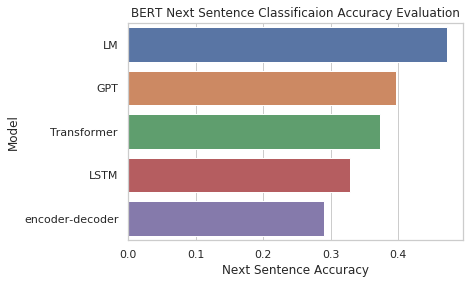

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
title = "BERT Next Sentence Classificaion Accuracy Evaluation"
ax = sns.barplot(x="Accuracy", y="Model", data = model_acc_df, orient = 'h')
plt.title(title)
plt.xlabel("Next Sentence Accuracy")
plt.show()